In [2]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

with open('./output.pkl', 'rb') as f:
  data = pickle.load(f)

1
3.47497 1.0663 2.40867 0.306853
3.50462 1.0754 2.42922 0.306853
3.57721 1.09768 2.47953 0.306853
3.61375 1.10889 2.50486 0.306853
3.71142 1.13886 2.57256 0.306853
3.4709 1.06506 2.40584 0.306853
----------
3
3.20621 0.983834 2.22237 0.306853
3.27373 1.00455 2.26918 0.306853
3.33723 1.02404 2.31319 0.306853
3.34791 1.02732 2.3206 0.306853
2.94107 0.902476 2.03859 0.306853
2.30123 0.70614 1.59509 0.306853
----------
4
2.44056 0.748892 1.69167 0.306853
3.70668 1.1374 2.56927 0.306853
3.72817 1.144 2.58417 0.306853
2.93384 0.900256 2.03358 0.306853
2.22862 0.683859 1.54476 0.306853
1.9127 0.586918 1.32578 0.306853
----------


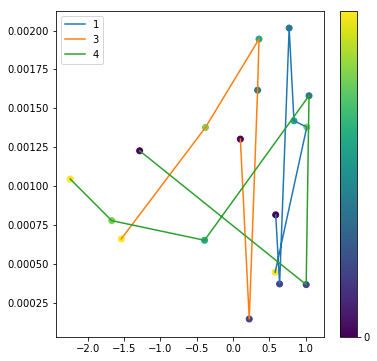

In [21]:
layers = [1, 3, 4]
iters = [0, 5, 10, 20, 1000, 9000]

def rotate(x, y, th):
  c, s = np.cos(th), np.sin(th)
  R = np.array([[c, -s], 
                [s, c]])
  xy_rot = R.dot(np.stack([x, y]))      
  return xy_rot[0], xy_rot[1]

plt.figure(figsize=(6, 6))
xy = []
for layer in layers:
  I_ty = [data['itr%d_layer%d' % (i, layer)]['mi'] for i in iters]
  I_tx = [data['itr%d_layer%d' % (i, layer)]['nll'] for i in iters]
  xy.append(np.stack([I_tx, I_ty]))
  # plt.plot(I_tx, I_ty)
  print(layer)
  for (itx, ity) in zip(I_tx, I_ty):
    print(itx, ity, itx - ity, ity/itx)
  print('-' * 10)
Z = np.concatenate(xy, axis=1)
mu = Z.mean(1, keepdims=True)
Z -= mu
cov = Z.dot(Z.T) / Z.shape[1]
L, V = np.linalg.eig(cov)
D = np.diag(np.sqrt(1e-8 + L))
for i, pts in enumerate(xy):
  rot = np.linalg.inv(D).dot(V.T.dot(pts - mu)) # * np.array([[1, 500]]).T
  # rot -= rot.mean(1, keepdims=True)
  plt.plot(*rot, 
           label=str(layers[i]))
  plt.scatter(*rot, c=np.linspace(0, 1, len(iters)))

plt.legend()
plt.colorbar(ticks=iters)


In [12]:
list(zip(I_tx, I_ty))

[(2.4405577, 0.74889207),
 (3.7281694, 1.1439993),
 (2.933835, 0.9002555),
 (2.2286229, 0.68385923),
 (1.9127028, 0.58691829)]

In [10]:
data

{'itr0_layer1': {'mi': 1.0663047, 'nll': 3.4749713},
 'itr0_layer3': {'mi': 0.98383391, 'nll': 3.2062078},
 'itr0_layer4': {'mi': 0.74889207, 'nll': 2.4405577},
 'itr1000_layer1': {'mi': 1.1388612, 'nll': 3.7114248},
 'itr1000_layer3': {'mi': 0.90247583, 'nll': 2.9410706},
 'itr1000_layer4': {'mi': 0.68385923, 'nll': 2.2286229},
 'itr10_layer1': {'mi': 1.0976768, 'nll': 3.577209},
 'itr10_layer3': {'mi': 1.0240376, 'nll': 3.3372271},
 'itr10_layer4': {'mi': 1.1439993, 'nll': 3.7281694},
 'itr20_layer1': {'mi': 1.1088885, 'nll': 3.6137471},
 'itr20_layer3': {'mi': 1.0273166, 'nll': 3.3479128},
 'itr20_layer4': {'mi': 0.9002555, 'nll': 2.933835},
 'itr5_layer1': {'mi': 1.0754027, 'nll': 3.504621},
 'itr5_layer3': {'mi': 1.0045524, 'nll': 3.2737274},
 'itr5_layer4': {'mi': 1.1374044, 'nll': 3.7066779},
 'itr9000_layer1': {'mi': 1.0650554, 'nll': 3.4709001},
 'itr9000_layer3': {'mi': 0.70613998, 'nll': 2.3012335},
 'itr9000_layer4': {'mi': 0.58691829, 'nll': 1.9127028}}

In [22]:
d = pickle.load(open('./tanh_data/0.pkl', 'rb'))

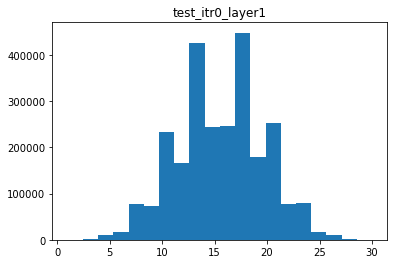

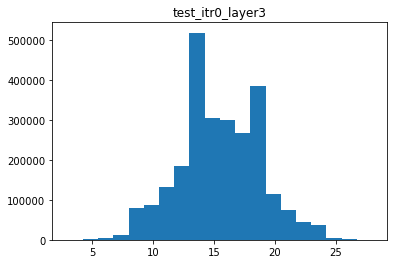

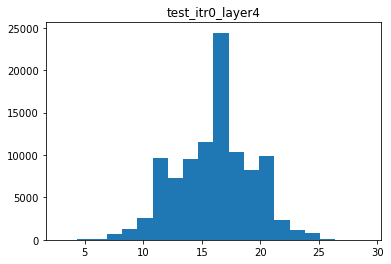

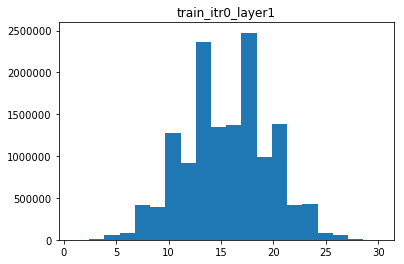

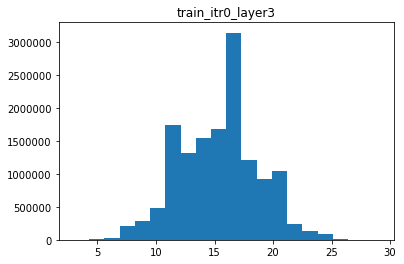

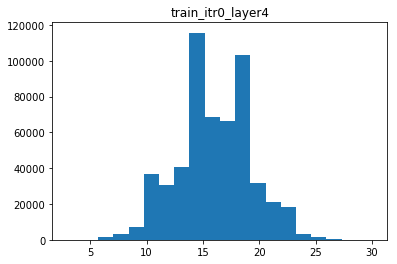

In [28]:
for k, v in sorted(d.items()):
  plt.figure()
  plt.title(k)
  plt.hist(np.digitize(v.ravel(), np.linspace(-1, 1, 31)), bins=20)